In [3]:
import numpy as np
import matplotlib.pyplot as plt

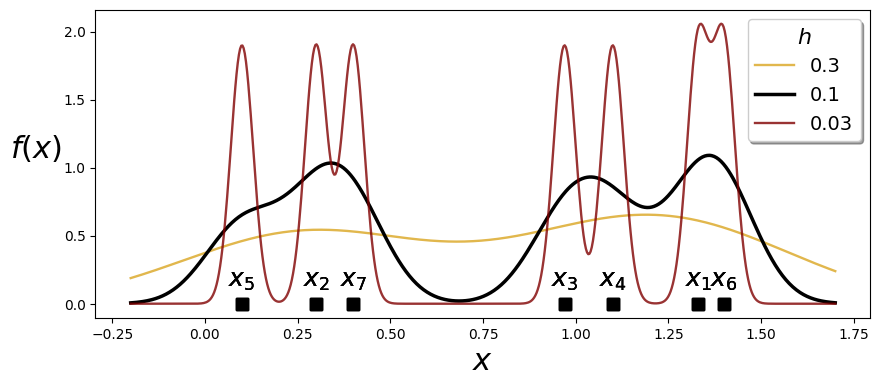

In [7]:
# the Kernel function
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# bandwith values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwith values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

plt.figure(figsize=(10,4))
# iterate over bandwith values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(r'$x_{}$'.format(i+1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18,
                    )
    y_range = total_sum/(h*n_samples)
    plt.plot(x_range, y_range,
             color=color, alpha=alpha, linewidth=width,
             label=f'{h}')

    plt.plot(dataset, np.zeros_like(dataset) , 's',
             markersize=8, color='black')

plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
plt.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
plt.show()

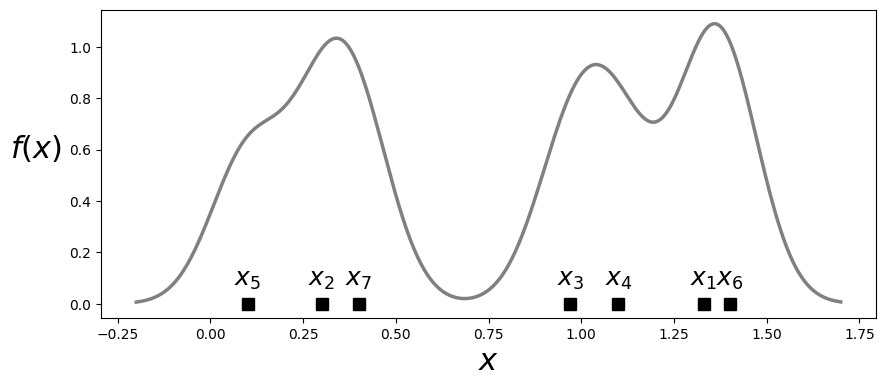

In [8]:
from sklearn.neighbors import KernelDensity

dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# KernelDensity requires 2D array
dataset = dataset[:, np.newaxis]

# fit KDE to the dataset
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)

# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density),
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 's',
         markersize=8, color='black')

plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()